<a href="https://colab.research.google.com/github/miniminseong/chp2/blob/main/%ED%86%B5%ED%95%A9%EB%B3%B8_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# <<<chapter 02>>> The mathematical building blocks of neural networks 

## A first look at a neural network

**Loading the MNIST dataset in Keras**

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels),s (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**The network architecture**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [ ]:
# 모델 만드는 다른 방법
from tensorflow import keras
from keras import models
from tensorflow.keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation = 'relu', input_shape = (28 * 28,)))
network.add(layers.Dense(10, activation = 'softmax'))

**The compilation step**

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

**Preparing the image data**

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

**"Fitting" the model**

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 8s 7ms/step - loss: 0.2558 - accuracy: 0.9260
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1034 - accuracy: 0.9688
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0679 - accuracy: 0.9803
Epoch 4/5
469/469 [==============================] - 3s 5ms/step - loss: 0.0492 - accuracy: 0.9856
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0377 - accuracy: 0.9882


**Using the model to make predictions**

In [ ]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

array([4.7969588e-09, 9.8964927e-11, 6.3673597e-06, 6.6579887e-05,
       1.0075826e-12, 1.3396310e-07, 1.5873742e-15, 9.9991918e-01,
       1.6472150e-07, 7.6394326e-06], dtype=float32)

In [ ]:
predictions[0].argmax()

7

In [ ]:
predictions[0][7]

0.9999192

In [ ]:
test_labels[0]

7

**Evaluating the model on new data**

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 2s 5ms/step - loss: 0.0642 - accuracy: 0.9803
test_acc: 0.9803000092506409


## Data representations for neural networks

### Scalars (rank-0 tensors)

In [ ]:
import numpy as np
x = np.array(12)
x

array(12)

In [ ]:
x.ndim

0

### Vectors (rank-1 tensors)

In [ ]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [ ]:
x.ndim

1

### Matrices (rank-2 tensors)

In [ ]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

### Rank-3 and higher-rank tensors

In [ ]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

### Key attributes

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images.ndim

3

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images.dtype

dtype('uint8')

**Displaying the fourth digit**

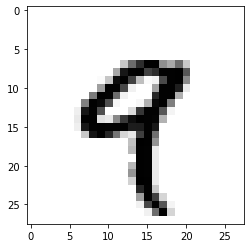

In [ ]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
train_labels[4]

9

### Manipulating tensors in NumPy

In [ ]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[:, 14:, 14:]

In [ ]:
my_slice = train_images[:, 7:-7, 7:-7]

### The notion of data batches

In [ ]:
batch = train_images[:128]

In [ ]:
batch = train_images[128:256]

In [ ]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]

### Real-world examples of data tensors

### Vector data

### Timeseries data or sequence data

### Image data

### Video data

## The gears of neural networks: tensor operations

### Element-wise operations

In [ ]:
def naive_relu(x):
    assert len(x.shape) == 2 # x는  2차원 데이터야 함.
    x = x.copy()
    for i in range(x.shape[0]): # 세로 개수
        for j in range(x.shape[1]): # 가로 개수
            x[i, j] = max(x[i, j], 0)
    return x

In [ ]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j] # x[i, j] = x[i, j] + y[i, j]
    return x

In [ ]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.03 s


In [ ]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 4.94 s


### Broadcasting

In [ ]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))

In [ ]:
y.shape

(10,)

In [ ]:
y = np.expand_dims(y, axis=0)

In [ ]:
y.shape

(1, 10)

In [ ]:
Y = np.concatenate([y] * 32, axis=0)

In [ ]:
Y.shape

(32, 10)

In [ ]:
#p.41
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [ ]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

### Tensor product p.44

In [ ]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)

In [ ]:
def naive_vector_dot(x, y): # vector 곱하기
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [ ]:
def naive_matrix_vector_dot(x, y): # 행렬 곱하기 벡터 (1)
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [ ]:
def naive_matrix_vector_dot(x, y): # 행렬 곱하기 벡터 (2)
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [ ]:
def naive_matrix_dot(x, y): # 행렬 곱하기 행렬
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

### Tensor reshaping 

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))

In [ ]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [ ]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [ ]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

### Geometric interpretation of tensor operations

### A geometric interpretation of deep learning

## The engine of neural networks: gradient-based optimization

### What's a derivative?

### Derivative of a tensor operation: the gradient

### Stochastic gradient descent

### Chaining derivatives: The Backpropagation algorithm

#### The chain rule

#### Automatic differentiation with computation graphs

#### The gradient tape in TensorFlow : p.78

In [ ]:
import tensorflow as tf
x = tf.Variable(0.)
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [ ]:
x = tf.Variable(tf.random.uniform((2, 2)))
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [ ]:
W = tf.Variable(tf.random.uniform((2, 2))) #행렬
b = tf.Variable(tf.zeros((2,))) #벡터
x = tf.random.uniform((2, 2)) #행렬
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b  # 행렬 곱 행렬 : matmul,  순서 잘보기(x가 먼저옴)
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])

## Looking back at our first example

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy", # label 데이터는 정수로 인코딩 되었으므로 sparse
              metrics=["accuracy"])

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2608 - accuracy: 0.9240
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1035 - accuracy: 0.9695
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0682 - accuracy: 0.9796
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0490 - accuracy: 0.9852
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0381 - accuracy: 0.9883


### Reimplementing our first example from scratch in TensorFlow
* 직접 method들 구현해보기 : p.85

#### A simple Dense class

In [ ]:
import tensorflow as tf
# Dense 직접 구현
class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        # 가중치 초기화
        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)
        # bias 값 초기화
        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b) # output = actovation(W*x + b)

    @property
    def weights(self):
        return [self.W, self.b]

#### A simple Sequential class

In [ ]:
class NaiveSequential: # p.86
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

In [ ]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

#### A batch generator : p.87

In [ ]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size) # 배치 개수

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

### Running one training step (training 한번) : p.87

In [ ]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch) # 배치데이터로 예측값 계산
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions) # loss 값 계산
        average_loss = tf.reduce_mean(per_sample_losses) # mse값 계산
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights) # 구한 gradient값을 바탕으로 가중치 업데이트
    return average_loss

In [ ]:
# Naive mini-batch gradient update

learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate) # w = w - g*learning_rate

In [ ]:
# Using Optimizer
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

### The full training loop : p.89

In [ ]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs): # epoch수만큼 학습
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels) # 배치 생성
        for batch_counter in range(batch_generator.num_batches): # 생성된 배치 수 만큼 다음을 반복
            images_batch, labels_batch = batch_generator.next()  # i번째 배치 데이터
            loss = one_training_step(model, images_batch, labels_batch) # i번째 배치 데이터로 train (이때 손실함수 값을 계산하고 그값을 바탕으로 gradient값을 구하고 gradient값을 바탕으로 가중치 업데이트)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

Epoch 0
loss at batch 0: 5.71
loss at batch 100: 2.25
loss at batch 200: 2.26
loss at batch 300: 2.11
loss at batch 400: 2.24
Epoch 1
loss at batch 0: 1.96
loss at batch 100: 1.88
loss at batch 200: 1.87
loss at batch 300: 1.72
loss at batch 400: 1.84
Epoch 2
loss at batch 0: 1.62
loss at batch 100: 1.58
loss at batch 200: 1.53
loss at batch 300: 1.43
loss at batch 400: 1.51
Epoch 3
loss at batch 0: 1.36
loss at batch 100: 1.33
loss at batch 200: 1.26
loss at batch 300: 1.21
loss at batch 400: 1.28
Epoch 4
loss at batch 0: 1.15
loss at batch 100: 1.15
loss at batch 200: 1.06
loss at batch 300: 1.04
loss at batch 400: 1.11
Epoch 5
loss at batch 0: 1.00
loss at batch 100: 1.01
loss at batch 200: 0.92
loss at batch 300: 0.92
loss at batch 400: 0.99
Epoch 6
loss at batch 0: 0.89
loss at batch 100: 0.90
loss at batch 200: 0.82
loss at batch 300: 0.83
loss at batch 400: 0.90
Epoch 7
loss at batch 0: 0.81
loss at batch 100: 0.82
loss at batch 200: 0.74
loss at batch 300: 0.76
loss at batch 40

### Evaluating the model

In [ ]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

accuracy: 0.82


## Summary

#-------------------------------------------------------------------------------------------------------------------------------------------

# <<<chapter 03>>> Introduction to Keras and TensorFlow

## What's TensorFlow?

## What's Keras?

## Keras and TensorFlow: A brief history

## Setting up a deep-learning workspace

### Jupyter notebooks: The preferred way to run deep-learning experiments

### Using Colaboratory

#### First steps with Colaboratory

#### Installing packages with pip

#### Using the GPU runtime

## First steps with TensorFlow

#### Constant tensors and variables : p.99

**All-ones or all-zeros tensors**

In [ ]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [ ]:
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


**Random tensors**

In [ ]:
# randomly sampling from normal dstn
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[ 0.9042613 ]
 [-0.21556522]
 [ 0.5520026 ]], shape=(3, 1), dtype=float32)


In [ ]:
# randomly sampling from uniform dstn
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.6118833 ]
 [0.02887893]
 [0.21812618]], shape=(3, 1), dtype=float32)


**NumPy arrays are assignable**

In [ ]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.

**Creating a TensorFlow variable : tf.Variable p.101**

In [ ]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.7998808 ],
       [-1.3375955 ],
       [ 0.42578787]], dtype=float32)>


**Assigning a value to a TensorFlow variable**

In [ ]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

**Assigning a value to a subset of a TensorFlow variable**

In [ ]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

** Using `assign_add` : += **

In [ ]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

#### Tensor operations: Doing math in TensorFlow

**A few basic math operations**

In [ ]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d

#### A second look at the GradientTape API
* tensorflow와 numpy는 비슷해보이지만 numpy가 못하는 것이 있다. 바로 gradient 계산을 못한다.

**Using the `GradientTape`**

In [ ]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

**Using `GradientTape` with constant tensor inputs**

In [ ]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

**Using nested gradient tapes to compute second-order gradients**

In [ ]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

#### An end-to-end example: A linear classifier in pure TensorFlow : tf만으로 linear classifier 만들어보기?
* p. 106

**Generating two classes of random points in a 2D plane**

In [ ]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

**Stacking the two classes into an array with shape (2000, 2)**

In [ ]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32) # 세로로 합치기

**Generating the corresponding targets (0 and 1)**

In [ ]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))
# negative_sample : 0, 
# positive_sample : 1

**Plotting the two point classes**

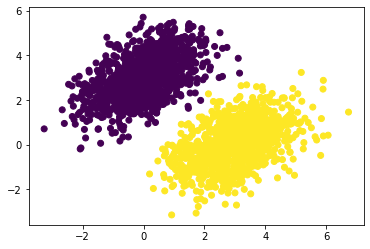

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

**Creating the linear classifier variables**

In [ ]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim))) # 초기 가중치
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,))) # 초기 bias

**The forward pass function**

In [ ]:
def model(inputs):
    return tf.matmul(inputs, W) + b # inputs shape : (2000, 2), W shape : (2, 1)

**The mean squared error loss function**

In [ ]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses) # mse 계산

**The training step function**

In [ ]:
# p.110
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs) # input데이터로 예측값 구하기
        loss = square_loss(targets, predictions) # loss 계산
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b]) # gradient 계산
    # 가중치 업데이트
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

**The batch training loop**

In [ ]:
for step in range(40): # 40 epochs
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 3.1747
Loss at step 1: 0.2268
Loss at step 2: 0.1197
Loss at step 3: 0.0996
Loss at step 4: 0.0916
Loss at step 5: 0.0858
Loss at step 6: 0.0806
Loss at step 7: 0.0759
Loss at step 8: 0.0716
Loss at step 9: 0.0676
Loss at step 10: 0.0640
Loss at step 11: 0.0607
Loss at step 12: 0.0577
Loss at step 13: 0.0549
Loss at step 14: 0.0524
Loss at step 15: 0.0501
Loss at step 16: 0.0480
Loss at step 17: 0.0460
Loss at step 18: 0.0443
Loss at step 19: 0.0426
Loss at step 20: 0.0412
Loss at step 21: 0.0398
Loss at step 22: 0.0386
Loss at step 23: 0.0374
Loss at step 24: 0.0364
Loss at step 25: 0.0354
Loss at step 26: 0.0346
Loss at step 27: 0.0338
Loss at step 28: 0.0330
Loss at step 29: 0.0324
Loss at step 30: 0.0317
Loss at step 31: 0.0312
Loss at step 32: 0.0307
Loss at step 33: 0.0302
Loss at step 34: 0.0298
Loss at step 35: 0.0294
Loss at step 36: 0.0290
Loss at step 37: 0.0287
Loss at step 38: 0.0284
Loss at step 39: 0.0281


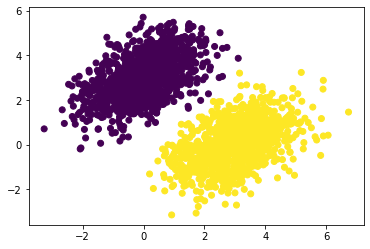

In [ ]:
predictions = model(inputs)
plt.scatter(inputs[:, 0] , inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

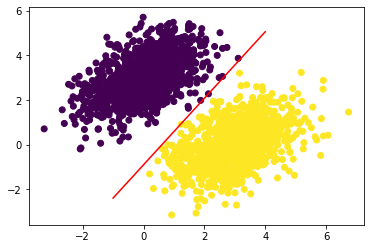

In [ ]:
# p.112
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1] # classifier
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

## Anatomy of a neural network: Understanding core Keras APIs

### Layers: The building blocks of deep learning

#### The base Layer class in Keras

**A `Dense` layer implemented as a `Layer` subclass**

In [ ]:
# p.114
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        # 가중치 생성
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        # bias 생성
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b ##
        if self.activation is not None:
            y = self.activation(y)
        return y

In [ ]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor) # --> W shape : (784, 32), b shape : (32, )
print(output_tensor.shape)

(2, 32)


In [ ]:
# 위 코드와 같은 결과
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

#### Automatic shape inference: Building layers on the fly

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [ ]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

### From layers to models

### The "compile" step: Configuring the learning process

In [ ]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [ ]:
# 위 코드와 동일한 결과
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

### Picking a loss function

### Understanding the fit() method

**Calling `fit()` with NumPy data**

In [ ]:
# p.119
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

Epoch 1/5
16/16 [==============================] - 1s 3ms/step - loss: 17.1279 - binary_accuracy: 0.4260
Epoch 2/5
16/16 [==============================] - 0s 3ms/step - loss: 16.5462 - binary_accuracy: 0.4220
Epoch 3/5
16/16 [==============================] - 0s 3ms/step - loss: 16.0501 - binary_accuracy: 0.4195
Epoch 4/5
16/16 [==============================] - 0s 4ms/step - loss: 15.5774 - binary_accuracy: 0.4170
Epoch 5/5
16/16 [==============================] - 0s 4ms/step - loss: 15.1159 - binary_accuracy: 0.4145


In [ ]:
history.history

{'binary_accuracy': [0.4259999990463257,
  0.421999990940094,
  0.4194999933242798,
  0.4169999957084656,
  0.41449999809265137],
 'loss': [17.12786865234375,
  16.54615020751953,
  16.05005645751953,
  15.577386856079102,
  15.115890502929688]}

### Monitoring loss and metrics on validation data

**Using the `validation_data` argument**

In [ ]:
# p.120
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs)) # 데이터 shuffle
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs)) # train : val = 7 : 3
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]

model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets) ##
)

Epoch 1/5
88/88 [==============================] - 1s 6ms/step - loss: 0.1430 - binary_accuracy: 0.9171 - val_loss: 0.0370 - val_binary_accuracy: 0.9983
Epoch 2/5
88/88 [==============================] - 0s 4ms/step - loss: 0.0763 - binary_accuracy: 0.9521 - val_loss: 0.0488 - val_binary_accuracy: 1.0000
Epoch 3/5
88/88 [==============================] - 0s 4ms/step - loss: 0.0739 - binary_accuracy: 0.9543 - val_loss: 0.0265 - val_binary_accuracy: 1.0000
Epoch 4/5
88/88 [==============================] - 0s 4ms/step - loss: 0.0721 - binary_accuracy: 0.9564 - val_loss: 0.0305 - val_binary_accuracy: 0.9967
Epoch 5/5
88/88 [==============================] - 0s 4ms/step - loss: 0.0754 - binary_accuracy: 0.9557 - val_loss: 0.0876 - val_binary_accuracy: 0.9350


### Inference: Using a model after training

In [ ]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

[[-0.15128088]
 [ 0.00926095]
 [-0.33252662]
 [ 0.48030248]
 [-0.12119395]
 [ 0.75672174]
 [ 0.7499029 ]
 [ 0.7836555 ]
 [-0.3602674 ]
 [ 0.7159759 ]]


## Summary

#-------------------------------------------------------------------------------------------------------------------------------------------

#<<<chapter 04>>> Getting started with neural networks: Classification and regression

## Classifying movie reviews: A binary classification example : p.126

### The IMDB dataset

**Loading the IMDB dataset**

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
train_labels[0]

1

In [ ]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [ ]:
# 필기
# list comprehension
[i * 2 for i in range(3)]

[0, 2, 4]

In [ ]:
# 필기
"-".join(['a', 'b', 'c'])

'a-b-c'

In [ ]:
word_index = imdb.get_word_index()  # word_index = ['I' : 3, 'like' : 2 ...]와 같이 "단어" : index 형태  
reverse_word_index = dict(  # reverse_index = [3 : 'I', 2 : 'like' ... ]와 같이 index : 단어 형태
    [(value, key) for (key, value) in word_index.items()])  # list comprehension 
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]]) # train 데이터의 첫번째 데이터(단어들의 index로 이뤄짐)를 단어로 디코딩
# index에 해당하는 단어 가져오기, 이때 3을 빼는 이유는 0, 1, 2는 단어가 아니라 padding, start of sequence, unknown을 의미하기 때문


1654784/1641221 [==============================] - 0s 0us/step


In [ ]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
decoded_review # train data 첫번째 데이터 decoding 결과

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [ ]:
# 데이터 vectorize 하기 (원핫 인코딩)
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) # results : 모든 데이터의 원핫 인코딩 결과를 담는 행렬 (데이터 수 * 10000 형태)
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1. # i번째 데이터가 j번째 단어를 갖고 있을 경우 해당 칸은 1로 채운다.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0] # 첫번째 데이터 원핫 인코딩 결과

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
# y값(label)값은 정수로 변환해준다. 
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [ ]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

### Building your model

**Model definition**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid") # sigmoid : binary classification일 때 자주 사용됨, 0에 가까우면 negative, 1에 가까우면 positive review
])

**Compiling the model**

In [ ]:
model.compile(optimizer="rmsprop",  # 혹은 optimizer = optimizers.RMSprop(lr = 0.001) : learning rate 설정
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 42ms/step - loss: 0.5193 - accuracy: 0.7955 - val_loss: 0.4234 - val_accuracy: 0.8286
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3136 - accuracy: 0.9014 - val_loss: 0.3492 - val_accuracy: 0.8541
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2290 - accuracy: 0.9251 - val_loss: 0.2795 - val_accuracy: 0.8907
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1802 - accuracy: 0.9416 - val_loss: 0.2735 - val_accuracy: 0.8926
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1478 - accuracy: 0.9526 - val_loss: 0.2804 - val_accuracy: 0.8882
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1229 - accuracy: 0.9611 - val_loss: 0.2957 - val_accuracy: 0.8861
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1030 - accuracy: 0.9669 - val_loss: 0.3068 - val_accuracy: 0.8842
Epoch 8/20
30

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

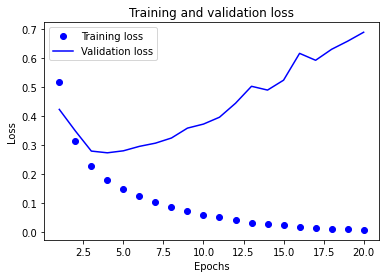

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

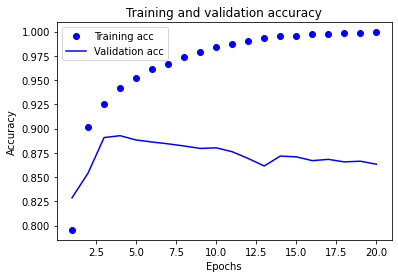

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

epoch 4이후 부터 overfitting 이 일어남.

**Retraining a model from scratch**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512) # epoch를 4로하고 다시 refit
results = model.evaluate(x_test, y_test) # test 데이터로 모델 평가

Epoch 1/4
49/49 [==============================] - 1s 14ms/step - loss: 0.5394 - accuracy: 0.7250
Epoch 2/4
49/49 [==============================] - 1s 13ms/step - loss: 0.2988 - accuracy: 0.9048
Epoch 3/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2189 - accuracy: 0.9246
Epoch 4/4
782/782 [==============================] - 4s 5ms/step - loss: 0.2856 - accuracy: 0.8856


In [ ]:
results

[0.2856222987174988, 0.8855599761009216]

### Using a trained model to generate predictions on new data

In [ ]:
model.predict(x_test) # 훈련된 모델로 test데이터로 값 예측 , 0에 가까울 수록 negative, 1에 가까울 수록 positive review

array([[0.19830313],
       [0.99618006],
       [0.8267284 ],
       ...,
       [0.13386625],
       [0.07824509],
       [0.6296587 ]], dtype=float32)

### Further experiments

### Wrapping up

## Classifying newswires: A multiclass classification example : p.137

### The Reuters dataset

**Loading the Reuters dataset**

In [ ]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [ ]:
len(train_data)

8982

In [ ]:
len(test_data)

2246

In [ ]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

**Decoding newswires back to text**

In [ ]:
# 디코딩
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

565248/550378 [==============================] - 0s 0us/step


In [ ]:
# 10번째 train data 디코딩 결과
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

### Preparing the data

**Encoding the input data**

In [ ]:
# x데이터 원핫 인코딩
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_test

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

**Encoding the labels**

In [ ]:
# y(label)데이터도 원핫 인코딩 해주기.
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension)) # results : 모든 데이터에 대해 원핫 인코딩 결과를 담는 행렬 (데이터 수 * 10000)
    for i, label in enumerate(labels):
        results[i, label] = 1. # i번째 데이터가 속하는 label에 1을 넣는다.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [ ]:
# 원핫 인코딩 쉽게하는 방법 : to_categorical (위와 같은 결과)
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Building your model

**Model definition**

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax") # 다중 분류일 때는 softmax
])

**Compiling the model**

In [ ]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy", # 다중 분류일 때 loss 함수는 categorical_crossentropy
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 31ms/step - loss: 2.4896 - accuracy: 0.5123 - val_loss: 1.6995 - val_accuracy: 0.6300
Epoch 2/20
16/16 [==============================] - 0s 18ms/step - loss: 1.4131 - accuracy: 0.7012 - val_loss: 1.3112 - val_accuracy: 0.7150
Epoch 3/20
16/16 [==============================] - 0s 18ms/step - loss: 1.0629 - accuracy: 0.7746 - val_loss: 1.1462 - val_accuracy: 0.7590
Epoch 4/20
16/16 [==============================] - 0s 17ms/step - loss: 0.8356 - accuracy: 0.8255 - val_loss: 1.0345 - val_accuracy: 0.7820
Epoch 5/20
16/16 [==============================] - 0s 19ms/step - loss: 0.6630 - accuracy: 0.8626 - val_loss: 0.9610 - val_accuracy: 0.8000
Epoch 6/20
16/16 [==============================] - 0s 19ms/step - loss: 0.5264 - accuracy: 0.8875 - val_loss: 0.9147 - val_accuracy: 0.8080
Epoch 7/20
16/16 [==============================] - 0s 18ms/step - loss: 0.4169 - accuracy: 0.9143 - val_loss: 0.9055 - val_accuracy: 0.8100
Epoch 8/20
16

**Plotting the training and validation loss**

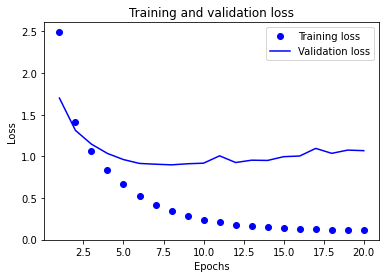

In [ ]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

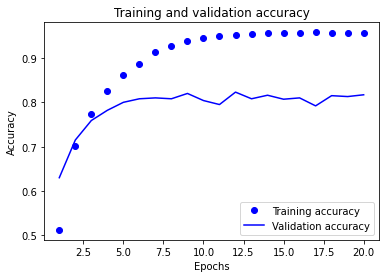

In [ ]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

epoch 9이후 부터 overfitting

**Retraining a model from scratch**

In [ ]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9, # epoch를 9로 설정하고 다시 refit
          batch_size=512)
results = model.evaluate(x_test, y_test) # refit한 모델을 test데이터로 평가 

Epoch 1/9
18/18 [==============================] - 1s 14ms/step - loss: 2.6155 - accuracy: 0.4855
Epoch 2/9
18/18 [==============================] - 0s 14ms/step - loss: 1.3759 - accuracy: 0.7125
Epoch 3/9
18/18 [==============================] - 0s 13ms/step - loss: 1.0114 - accuracy: 0.7841
Epoch 4/9
18/18 [==============================] - 0s 14ms/step - loss: 0.7851 - accuracy: 0.8321
Epoch 5/9
18/18 [==============================] - 0s 14ms/step - loss: 0.6240 - accuracy: 0.8674
Epoch 6/9
18/18 [==============================] - 0s 14ms/step - loss: 0.4948 - accuracy: 0.8985
Epoch 7/9
18/18 [==============================] - 0s 14ms/step - loss: 0.3969 - accuracy: 0.9173
Epoch 8/9
18/18 [==============================] - 0s 13ms/step - loss: 0.3243 - accuracy: 0.9299
Epoch 9/9
71/71 [==============================] - 0s 4ms/step - loss: 0.9545 - accuracy: 0.7925


In [ ]:
results

[0.9544541835784912, 0.7925200462341309]

In [ ]:
# 무작위로 아무 classifier를 사용했을 때 accuracy는 0.18
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy) # test_labels_copy 무작위로 label 예측
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.1767586821015138

### Generating predictions on new data

In [ ]:
predictions = model.predict(x_test) # final 모델에 test데이터로 예측값 구하기

In [ ]:
predictions[0] # 첫번째 test데이터 예측 결과 (46개의 class에 대한 확률로 나타남)

array([2.4148363e-04, 3.6833112e-04, 1.8537941e-05, 2.5699258e-01,
       7.0644933e-01, 1.2102045e-05, 4.3375540e-04, 3.9267434e-05,
       2.7118686e-03, 1.0429467e-04, 3.9408621e-04, 1.3482170e-03,
       8.7672326e-04, 3.7572571e-04, 6.0937840e-05, 5.1702285e-05,
       1.9797226e-02, 1.8653399e-04, 1.5706074e-04, 1.7738498e-03,
       3.4599204e-03, 1.3281557e-03, 1.0953361e-04, 3.0039111e-04,
       1.4029443e-04, 2.3516508e-04, 3.8884177e-06, 8.3412502e-05,
       2.6071579e-05, 2.6044241e-05, 1.4414146e-04, 4.4634831e-04,
       5.1145958e-05, 2.1091109e-05, 2.6533920e-05, 1.3741351e-05,
       4.9296732e-04, 1.3860807e-05, 1.0211841e-05, 5.3270283e-04,
       8.0343809e-05, 1.2007202e-05, 4.9820487e-06, 3.0125191e-05,
       1.0186027e-05, 3.0371937e-06], dtype=float32)

In [ ]:
np.sum(predictions[0]) # 확률값의 총 합은 1

1.0

In [ ]:
np.argmax(predictions[0]) # 확률값이 가장 높은 index는 3번째 index --> 첫번째 test데이터를 class 3으로 예측

4

### A different way to handle the labels and the loss
레이블을 인코딩할 때 원핫인코딩 말고 다른방식으로 label을 나타내는 방법. --> 정수로 형변환

In [ ]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### The importance of having sufficiently large intermediate layers

**A model with an information bottleneck**

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),  # 중간층이 4차원으로 매우 작을 경우 --> accuracy가 떨어짐 --> 충분히 큰 layer를 사용하자
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 11ms/step - loss: 2.7379 - accuracy: 0.3306 - val_loss: 1.9488 - val_accuracy: 0.5960
Epoch 2/20
63/63 [==============================] - 0s 7ms/step - loss: 1.6630 - accuracy: 0.5965 - val_loss: 1.5424 - val_accuracy: 0.5880
Epoch 3/20
63/63 [==============================] - 0s 8ms/step - loss: 1.3622 - accuracy: 0.6319 - val_loss: 1.4054 - val_accuracy: 0.6410
Epoch 4/20
63/63 [==============================] - 0s 7ms/step - loss: 1.1767 - accuracy: 0.6771 - val_loss: 1.3356 - val_accuracy: 0.6540
Epoch 5/20
63/63 [==============================] - 0s 7ms/step - loss: 1.0393 - accuracy: 0.7095 - val_loss: 1.3162 - val_accuracy: 0.6800
Epoch 6/20
63/63 [==============================] - 0s 7ms/step - loss: 0.9319 - accuracy: 0.7518 - val_loss: 1.2881 - val_accuracy: 0.6900
Epoch 7/20
63/63 [==============================] - 0s 8ms/step - loss: 0.8429 - accuracy: 0.7838 - val_loss: 1.3017 - val_accuracy: 0.7020
Epoch 8/20
63/63 [=

### Further experiments

### Wrapping up

:## Predicting house prices: A regression example : p.153

### The Boston Housing Price dataset

**Loading the Boston housing dataset**

In [ ]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [ ]:
train_data.shape

(404, 13)

In [ ]:
test_data.shape

(102, 13)

In [ ]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### Preparing the data

**Normalizing the data**

In [ ]:
# 연속형 데이터는 정규화 해줘야한다.
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

### Building your model

**Model definition**

In [ ]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1) # regression은 마지막 layer에 activation function 사용할 필요 X
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"]) # 평가지표 mae : 평균 절대값 오차 (예측과 target 사이 거리의 절댓값)
    return model

### Validating your approach using K-fold validation

**K-fold validation**

In [ ]:
# k-fold를 사용한 훈련 검증
k = 4
num_val_samples = len(train_data) // k # 각 fold에 들어있는 데이터 수
num_epochs = 100
all_scores = [] # 각 fold에서의 score(val_mae)를 담는 리스트
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples : (i + 1) * num_val_samples] # validation X 데이터
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples] # validation y 데이터
    partial_train_data = np.concatenate( # validation X을 제외한 train_x 데이터
        [train_data[ : i * num_val_samples],
         train_data[(i + 1) * num_val_samples : ]],
        axis=0)
    partial_train_targets = np.concatenate( # validation y를 제외한 train_y데이터
        [train_targets[ : i * num_val_samples],
         train_targets[(i + 1) * num_val_samples : ]],
        axis=0)
    #모델 생성
    model = build_model()
    # 모델 훈련 (partial_train_data, partial_train_target 데이터로 훈련)
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    # val_data로 모델 evaluate
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    # evaluate한 결과를 all_score에 담음
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [ ]:
all_scores # Fold1에서의 val_mae, Fold 2에서의 val_mae, Fold 3에서의 val_mae, Fold 4에서의 val_mae

[1.7308186292648315, 2.4588727951049805, 2.354313850402832, 2.5724997520446777]

In [ ]:
np.mean(all_scores) # 4개의 fold들에서의 val_mae 평균한 값

2.2791262567043304

**Saving the validation logs at each fold**

In [ ]:
#p.158
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0) # 각 FOLD에서 500번의 epoch를 돌며 학습
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history) # 각 fold에서 500번 epoch를 돌때마다 나온 val_mae가 모두 담기게됨. ( 500 * 4 )

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


**Building the history of successive mean K-fold validation scores**

In [ ]:
first_epoch = [x[0] for x in all_mae_histories] # 첫번째 epoch에서 각 fold에 대한 val_mae값
first_epoch

[18.248432159423828,
 20.447385787963867,
 17.850547790527344,
 21.519832611083984]

In [ ]:
average_mae_history = [ # 첫번째 epoch에서의 val_mae값 , # 두번째 epoch에서의 val_mae값 ... 500번째 epoch에서의 val_mae값
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [ ]:
len(average_mae_history) # 각 epoch에서의 val_mae값

500

**Plotting validation scores**

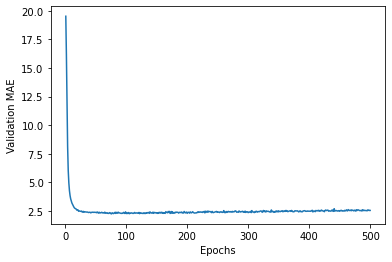

In [ ]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Plotting validation scores, excluding the first 10 data points**

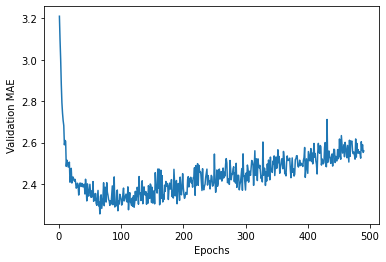

In [ ]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [ ]:
# 120-140번째 epoch에서부터 overfitting

**Training the final model**

In [ ]:
model = build_model() 
# 최종모델
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
# test데이터로 최종 모델 평가
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 4ms/step - loss: 15.6565 - mae: 2.6353


In [ ]:
test_mae_score

2.6352622509002686

### Generating predictions on new data

In [ ]:
# test데이터로 예측
predictions = model.predict(test_data)
predictions[0] # 첫번째 test 데이터 예측값

array([8.18584], dtype=float32)

### Wrapping up

## Summary

#-------------------------------------------------------------------------------------------------------------------------------------------

#<<<chapter 05>>> Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28)) # flatten
train_images = train_images.astype("float32") / 255 # 정규화


train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1) # train_image에 noise 데이터 784개 추가 --> train_images_with_noise_channels shape : (60000, 1568)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1) # train_image에 all zero 데이터 784개 추가 --> train_images_with_zeros_channels shape : (60000, 1568)


**Training the same model on MNIST data with noise channels or all-zero channels**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax") # 다중분류
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy", # 다중분류
                  metrics=["accuracy"])
    return model
# noise 추가한 데이터 fit
model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)
# zero vector 추가한 데이터 fit
model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 6ms/step - loss: 0.6222 - accuracy: 0.8127 - val_loss: 0.2522 - val_accuracy: 0.9237
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.2442 - accuracy: 0.9236 - val_loss: 0.1959 - val_accuracy: 0.9424
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1599 - accuracy: 0.9506 - val_loss: 0.1463 - val_accuracy: 0.9558
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1125 - accuracy: 0.9648 - val_loss: 0.1302 - val_accuracy: 0.9639
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0811 - accuracy: 0.9741 - val_loss: 0.1225 - val_accuracy: 0.9633
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0584 - accuracy: 0.9818 - val_loss: 0.1215 - val_accuracy: 0.9668
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0441 - accuracy: 0.9853 - val_loss: 0.1060 - val_accuracy: 0.9709
Epoch 

**Plotting a validation accuracy comparison**

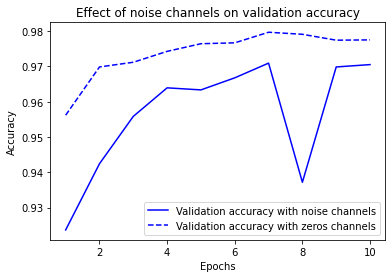

In [ ]:
# 두 모델의 val_accuracy 그래프로 시각화
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels) # randomly shuffle labels

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 5ms/step - loss: 2.3175 - accuracy: 0.1039 - val_loss: 2.3087 - val_accuracy: 0.1067
Epoch 2/100
375/375 [==============================] - 2s 4ms/step - loss: 2.3007 - accuracy: 0.1181 - val_loss: 2.3106 - val_accuracy: 0.1051
Epoch 3/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2899 - accuracy: 0.1289 - val_loss: 2.3184 - val_accuracy: 0.1046
Epoch 4/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2759 - accuracy: 0.1384 - val_loss: 2.3285 - val_accuracy: 0.1029
Epoch 5/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2586 - accuracy: 0.1559 - val_loss: 2.3386 - val_accuracy: 0.1039
Epoch 6/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2383 - accuracy: 0.1669 - val_loss: 2.3493 - val_accuracy: 0.0997
Epoch 7/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2123 - accuracy: 0.1862 - val_loss: 2.3670 - val_accuracy: 0.1013

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [ ]:
# p.191
# learning rate는 어느정도?
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.), # 큰 learning rate
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 5ms/step - loss: 1027.2461 - accuracy: 0.3693 - val_loss: 7.2814 - val_accuracy: 0.3190
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 3.6113 - accuracy: 0.2505 - val_loss: 2.1671 - val_accuracy: 0.2273
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 3.0311 - accuracy: 0.2620 - val_loss: 2.1099 - val_accuracy: 0.2082
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 2.6901 - accuracy: 0.2681 - val_loss: 2.7255 - val_accuracy: 0.2617
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 3.0557 - accuracy: 0.2575 - val_loss: 3.1008 - val_accuracy: 0.2888
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 2.8299 - accuracy: 0.2602 - val_loss: 2.9212 - val_accuracy: 0.2644
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 2.8744 - accuracy: 0.2465 - val_loss: 2.2533 - val_accuracy: 0.2933
Epo

**The same model with a more appropriate learning rate**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2), # 작은 learning rate
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3905 - accuracy: 0.9100 - val_loss: 0.1606 - val_accuracy: 0.9561
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1400 - accuracy: 0.9626 - val_loss: 0.1697 - val_accuracy: 0.9594
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1131 - accuracy: 0.9732 - val_loss: 0.1946 - val_accuracy: 0.9610
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0995 - accuracy: 0.9780 - val_loss: 0.1825 - val_accuracy: 0.9697
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0862 - accuracy: 0.9823 - val_loss: 0.1779 - val_accuracy: 0.9747
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0803 - accuracy: 0.9845 - val_loss: 0.2325 - val_accuracy: 0.9712
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0780 - accuracy: 0.9857 - val_loss: 0.2304 - val_accuracy: 0.9737
Epoch 

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [ ]:
model = keras.Sequential([layers.Dense(10, activation="softmax")]) # layer 1개
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.6612 - accuracy: 0.8374 - val_loss: 0.3575 - val_accuracy: 0.9019
Epoch 2/20
375/375 [==============================] - 1s 4ms/step - loss: 0.3511 - accuracy: 0.9023 - val_loss: 0.3106 - val_accuracy: 0.9145
Epoch 3/20
375/375 [==============================] - 1s 4ms/step - loss: 0.3156 - accuracy: 0.9122 - val_loss: 0.2894 - val_accuracy: 0.9175
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2994 - accuracy: 0.9169 - val_loss: 0.2814 - val_accuracy: 0.9216
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2900 - accuracy: 0.9179 - val_loss: 0.2758 - val_accuracy: 0.9237
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2828 - accuracy: 0.9207 - val_loss: 0.2731 - val_accuracy: 0.9225
Epoch 7/20
375/375 [==============================] - 1s 4ms/step - loss: 0.2779 - accuracy: 0.9222 - val_loss: 0.2683 - val_accuracy: 0.9272
Epoch 

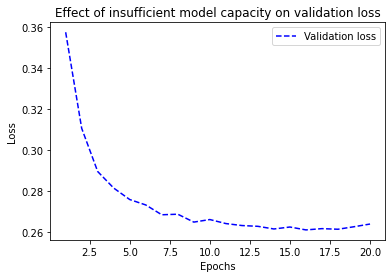

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
model = keras.Sequential([ # bigger model
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 5ms/step - loss: 0.3602 - accuracy: 0.8975 - val_loss: 0.1955 - val_accuracy: 0.9439
Epoch 2/20
375/375 [==============================] - 2s 4ms/step - loss: 0.1633 - accuracy: 0.9523 - val_loss: 0.1357 - val_accuracy: 0.9592
Epoch 3/20
375/375 [==============================] - 2s 4ms/step - loss: 0.1197 - accuracy: 0.9650 - val_loss: 0.1272 - val_accuracy: 0.9621
Epoch 4/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0940 - accuracy: 0.9713 - val_loss: 0.1075 - val_accuracy: 0.9687
Epoch 5/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0761 - accuracy: 0.9767 - val_loss: 0.1166 - val_accuracy: 0.9685
Epoch 6/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0625 - accuracy: 0.9811 - val_loss: 0.0934 - val_accuracy: 0.9736
Epoch 7/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0515 - accuracy: 0.9843 - val_loss: 0.1009 - val_accuracy: 0.9705
Epoch 

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

과대적합을 방지해주는 Regularization 하는 방법을 배워보자

#### Reducing the network's size



**Original model : 16개 노드**

In [ ]:
# p.200
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 44ms/step - loss: 0.5719 - accuracy: 0.7235 - val_loss: 0.4548 - val_accuracy: 0.8591
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3581 - accuracy: 0.8925 - val_loss: 0.3356 - val_accuracy: 0.8791
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2523 - accuracy: 0.9198 - val_loss: 0.2889 - val_accuracy: 0.8905
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1970 - accuracy: 0.9377 - val_loss: 0.2785 - val_accuracy: 0.8907
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1603 - accuracy: 0.9511 - val_loss: 0.2786 - val_accuracy: 0.8896
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1323 - accuracy: 0.9593 - val_loss: 0.2895 - val_accuracy: 0.8866
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1092 - accuracy: 0.9690 - val_loss: 0.3087 - val_accuracy: 0.8850
Epoch 8/20
30

**Version of the model with lower capacity : 4개 노드**

In [ ]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 41ms/step - loss: 0.6271 - accuracy: 0.7504 - val_loss: 0.5602 - val_accuracy: 0.8480
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.5032 - accuracy: 0.8732 - val_loss: 0.4695 - val_accuracy: 0.8583
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4131 - accuracy: 0.8893 - val_loss: 0.4089 - val_accuracy: 0.8690
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3468 - accuracy: 0.9039 - val_loss: 0.3573 - val_accuracy: 0.8804
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2971 - accuracy: 0.9129 - val_loss: 0.3250 - val_accuracy: 0.8831
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2583 - accuracy: 0.9229 - val_loss: 0.3021 - val_accuracy: 0.8886
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2277 - accuracy: 0.9314 - val_loss: 0.2917 - val_accuracy: 0.8872
Epoch 8/20
30

**Version of the model with higher capacity : 512개 노드**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 48ms/step - loss: 0.5432 - accuracy: 0.7623 - val_loss: 0.3613 - val_accuracy: 0.8518
Epoch 2/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2491 - accuracy: 0.9003 - val_loss: 0.2719 - val_accuracy: 0.8916
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1523 - accuracy: 0.9428 - val_loss: 0.3020 - val_accuracy: 0.8919
Epoch 4/20
30/30 [==============================] - 1s 32ms/step - loss: 0.0912 - accuracy: 0.9714 - val_loss: 0.3515 - val_accuracy: 0.8885
Epoch 5/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1012 - accuracy: 0.9787 - val_loss: 0.3635 - val_accuracy: 0.8896
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.0040 - accuracy: 0.9995 - val_loss: 0.5059 - val_accuracy: 0.8872
Epoch 7/20
30/30 [==============================] - 1s 30ms/step - loss: 5.5364e-04 - accuracy: 1.0000 - val_loss: 0.6168 - val_accuracy: 0.8858
Epoch 8/2

#### Adding weight regularization : 가중치 규제 추가

**Adding L2 weight regularization to the model**

In [ ]:
# p.202
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002), # add L2 norm
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002), # add L2 norm
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 41ms/step - loss: 0.6584 - accuracy: 0.7248 - val_loss: 0.5496 - val_accuracy: 0.8513
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.4732 - accuracy: 0.8773 - val_loss: 0.4343 - val_accuracy: 0.8786
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3744 - accuracy: 0.9067 - val_loss: 0.3982 - val_accuracy: 0.8747
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3264 - accuracy: 0.9182 - val_loss: 0.3764 - val_accuracy: 0.8821
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2984 - accuracy: 0.9265 - val_loss: 0.3596 - val_accuracy: 0.8869
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2798 - accuracy: 0.9323 - val_loss: 0.3835 - val_accuracy: 0.8736
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2687 - accuracy: 0.9361 - val_loss: 0.3635 - val_accuracy: 0.8842
Epoch 8/20
30

**Different weight regularizers available in Keras* : L1 혹은 L1 L2 둘다사용*

In [ ]:
from tensorflow.keras import regularizers
regularizers.l1(0.001) # add L1 norm
regularizers.l1_l2(l1=0.001, l2=0.001) # l1, l2 규제 병행

#### Adding dropout

**Adding dropout to the IMDB model**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),# add dropout
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5), # add dropout
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 64ms/step - loss: 0.6231 - accuracy: 0.6513 - val_loss: 0.5070 - val_accuracy: 0.8468
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.4985 - accuracy: 0.7775 - val_loss: 0.3879 - val_accuracy: 0.8744
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.4124 - accuracy: 0.8312 - val_loss: 0.3282 - val_accuracy: 0.8854
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3517 - accuracy: 0.8685 - val_loss: 0.2974 - val_accuracy: 0.8882
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3052 - accuracy: 0.8941 - val_loss: 0.2855 - val_accuracy: 0.8854
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2673 - accuracy: 0.9077 - val_loss: 0.2714 - val_accuracy: 0.8928
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2360 - accuracy: 0.9205 - val_loss: 0.2741 - val_accuracy: 0.8934
Epoch 8/20
30

## Summary

#-------------------------------------------------------------------------------------------------------------------------------------------

#<<<chapter 07>>> Working with Keras: A deep dive

## A spectrum of workflows

## Different ways to build Keras models

### The Sequential model : p.211

**The `Sequential` class**

In [ ]:
# 방법1
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

**Incrementally building a Sequential model**

In [ ]:
# 방법2 : model.add() 사용
model = keras.Sequential()
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

**Calling a model for the first time to build it**

In [ ]:
model.build(input_shape=(None, 3)) # build() 를 하고나면 ,weight값이 생긴다.
model.weights

[<tf.Variable 'dense_84/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[ 0.0360831 ,  0.02487564, -0.10711561,  0.22940934,  0.20426786,
          0.00093672,  0.16004121,  0.16656628,  0.12133801,  0.00882196,
         -0.28750253,  0.24334157, -0.15939565,  0.11447537,  0.13146904,
         -0.07379544, -0.22460756, -0.04539558, -0.29470384, -0.10358541,
          0.03455627,  0.10067594, -0.08103156, -0.0986471 ,  0.08227351,
         -0.02310994,  0.27344996, -0.21476197, -0.13800205, -0.08159941,
          0.06588987, -0.24350642,  0.28598136, -0.14210902,  0.00855312,
          0.17565915,  0.27932447,  0.11204734, -0.11738372,  0.03563076,
         -0.0327307 , -0.1429607 , -0.22639894, -0.01060921, -0.09559557,
          0.16278017,  0.04578158,  0.291413  , -0.29833457, -0.08230476,
          0.08696631,  0.20861161,  0.00393796,  0.29042774,  0.02024263,
          0.08880985, -0.14431302,  0.06279531,  0.21370375,  0.0286983 ,
          0.24183941,  0.03680187,  0.0616

**The summary method**

In [ ]:
model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_84 (Dense)            (None, 64)                256       
                                                                 
 dense_85 (Dense)            (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


**Naming models and layers with the `name` argument**

In [ ]:
model = keras.Sequential(name="my_example_model")
model.add(layers.Dense(64, activation="relu", name="my_first_layer"))
model.add(layers.Dense(10, activation="softmax", name="my_last_layer"))
model.build((None, 3))
model.summary()

Model: "my_example_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_first_layer (Dense)      (None, 64)                256       
                                                                 
 my_last_layer (Dense)       (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


**Specifying the input shape of your model in advance**

In [ ]:
model = keras.Sequential()
model.add(keras.Input(shape=(3,)))
model.add(layers.Dense(64, activation="relu"))

In [ ]:
model.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_86 (Dense)            (None, 64)                256       
                                                                 
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_86 (Dense)            (None, 64)                256       
                                                                 
 dense_87 (Dense)            (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


### The Functional API : p.217

#### A simple example

**A simple Functional model with two `Dense` layers**

In [ ]:
inputs = keras.Input(shape=(3,), name="my_input")
features = layers.Dense(64, activation="relu")(inputs)
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
inputs = keras.Input(shape=(3,), name="my_input")

In [ ]:
inputs.shape

TensorShape([None, 3])

In [ ]:
inputs.dtype

tf.float32

In [ ]:
features = layers.Dense(64, activation="relu")(inputs)

In [ ]:
features.shape

TensorShape([None, 64])

In [ ]:
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_90 (Dense)            (None, 64)                256       
                                                                 
 dense_91 (Dense)            (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


#### Multi-input, multi-output models : p.219

**A multi-input, multi-output Functional model**

In [ ]:
# 3개의 input
vocabulary_size = 10000
num_tags = 100
num_departments = 4


# Define model inputs
title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

features = layers.Concatenate()([title, text_body, tags])
features = layers.Dense(64, activation="relu")(features)

# 2개의 output
priority = layers.Dense(1, activation="sigmoid", name="priority")(features)
department = layers.Dense(
    num_departments, activation="softmax", name="department")(features)

model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])

#### Training a multi-input, multi-output model

**Training a model by providing lists of input & target arrays**

In [ ]:
import numpy as np

num_samples = 1280

# input 데이터 생성
title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size)) # 정수 0, 1 랜덤으로 뽑기
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size)) # 정수 0, 1 랜덤으로 뽑기
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

# output 데이터 생성
priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

# compile
model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
# fit
model.fit([title_data, text_body_data, tags_data],   # 리스트로 묶기
          [priority_data, department_data],  # 리스트로 묶기
          epochs=1)
# evaluate
model.evaluate([title_data, text_body_data, tags_data],
               [priority_data, department_data])
priority_preds, department_preds = model.predict([title_data, text_body_data, tags_data])

40/40 [==============================] - 0s 5ms/step - loss: 17.9434 - priority_loss: 0.3492 - department_loss: 17.5942 - priority_mean_absolute_error: 0.5152 - department_accuracy: 0.5617


**Training a model by providing dicts of input & target arrays**

In [ ]:
# training 하는 다른 방법 : 딕셔너리로 입력(단 layer의 이름을 지정해주었을 경우에만 사용가능)
model.compile(optimizer="rmsprop",
              loss={"priority": "mean_squared_error", "department": "categorical_crossentropy"},
              metrics={"priority": ["mean_absolute_error"], "department": ["accuracy"]})

model.fit({"title": title_data, "text_body": text_body_data, "tags": tags_data},
          {"priority": priority_data, "department": department_data},
          epochs=1)
model.evaluate({"title": title_data, "text_body": text_body_data, "tags": tags_data},
               {"priority": priority_data, "department": department_data})
priority_preds, department_preds = model.predict(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

40/40 [==============================] - 0s 6ms/step - loss: 40.4431 - priority_loss: 0.3492 - department_loss: 40.0940 - priority_mean_absolute_error: 0.5152 - department_accuracy: 0.2375


#### The power of the Functional API: Access to layer connectivity

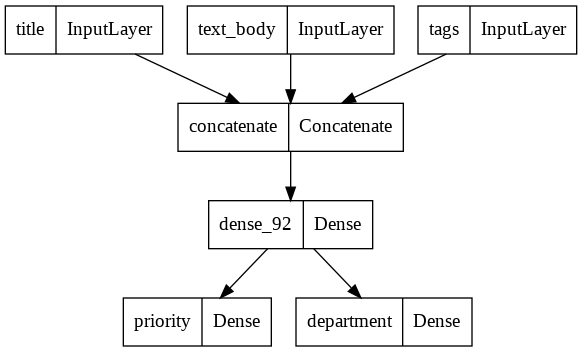

In [ ]:
keras.utils.plot_model(model, "ticket_classifier.png")

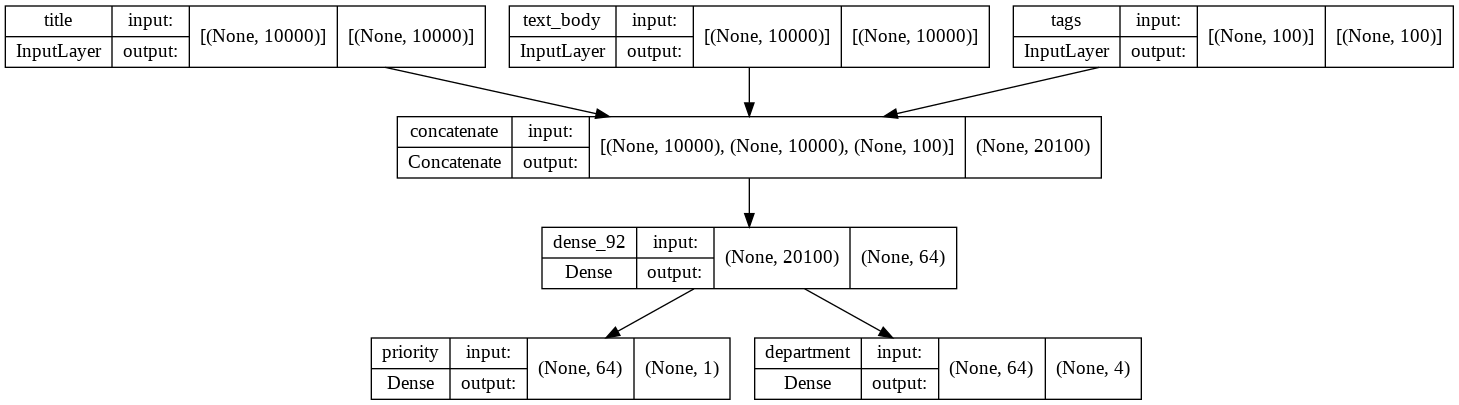

In [ ]:
keras.utils.plot_model(model, "ticket_classifier_with_shape_info.png", show_shapes=True)

**Retrieving the inputs or outputs of a layer in a Functional model**

In [ ]:
model.layers

In [ ]:
model.layers[3].input

[<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>,
 <KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'text_body')>,
 <KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'tags')>]

In [ ]:
model.layers[3].output

<KerasTensor: shape=(None, 20100) dtype=float32 (created by layer 'concatenate')>

**Creating a new model by reusing intermediate layer outputs**

In [ ]:
features = model.layers[4].output
difficulty = layers.Dense(3, activation="softmax", name="difficulty")(features)

new_model = keras.Model(
    inputs=[title, text_body, tags],
    outputs=[priority, department, difficulty])

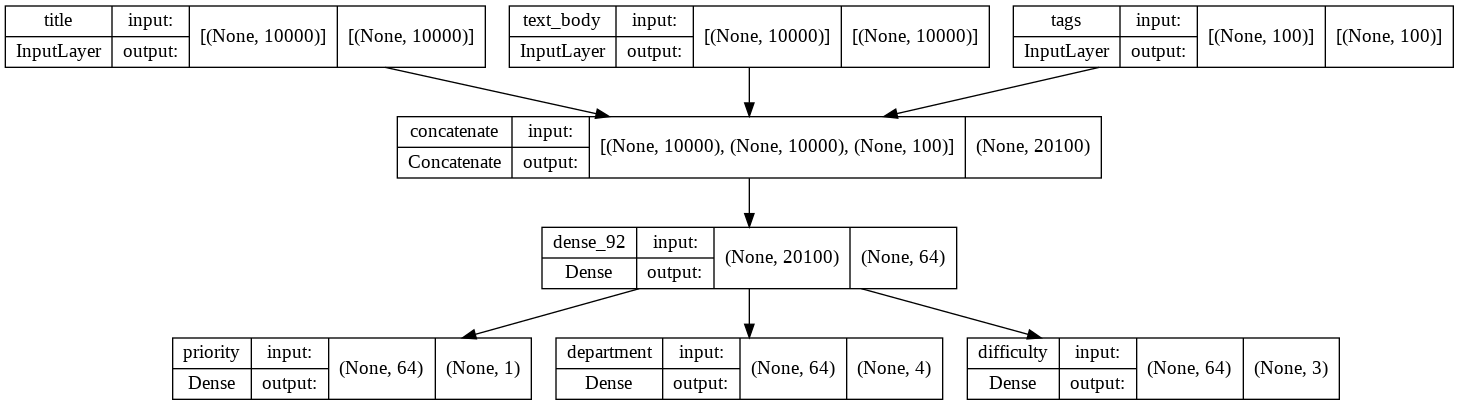

In [ ]:
keras.utils.plot_model(new_model, "updated_ticket_classifier.png", show_shapes=True)

### Subclassing the Model class : p.225

#### Rewriting our previous example as a subclassed model

**A simple subclassed model**

In [ ]:
class CustomerTicketModel(keras.Model):  

    def __init__(self, num_departments):
        super().__init__()
        # Define sublayers 
        self.concat_layer = layers.Concatenate()
        self.mixing_layer = layers.Dense(64, activation="relu")
        # output layer (priority_scorer, department_classifier) 생성
        self.priority_scorer = layers.Dense(1, activation="sigmoid")
        self.department_classifier = layers.Dense(
            num_departments, activation="softmax")

    def call(self, inputs): # 객체를 호출, 이때 inputs은 dictionary 자료형 이어야함.
        # input data
        title = inputs["title"]
        text_body = inputs["text_body"]
        tags = inputs["tags"]

        features = self.concat_layer([title, text_body, tags])
        features = self.mixing_layer(features)
        # output : priority, department <-- output layer에 대입해서 구함
        priority = self.priority_scorer(features)
        department = self.department_classifier(features)
        return priority, department

In [ ]:
model = CustomerTicketModel(num_departments=4) # nun_departments = 4인 객체 생성 (model)
 
priority, department = model( # 객체 호출
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

In [ ]:
model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
# dictionary방식으로 fitting
model.fit({"title": title_data,
           "text_body": text_body_data,
           "tags": tags_data},
          [priority_data, department_data],
          epochs=1)
model.evaluate({"title": title_data,
                "text_body": text_body_data,
                "tags": tags_data},
               [priority_data, department_data])
priority_preds, department_preds = model.predict({"title": title_data,
                                                  "text_body": text_body_data,
                                                  "tags": tags_data})

40/40 [==============================] - 1s 8ms/step - loss: 24.5211 - output_1_loss: 0.3475 - output_2_loss: 24.1735 - output_1_mean_absolute_error: 0.5134 - output_2_accuracy: 0.3281


#### Beware: What subclassed models don't support

### Mixing and matching different components

**Creating a Functional model that includes a subclassed model**

In [ ]:
# p.229, 나만의 Classifier class 만들기
class Classifier(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        if num_classes == 2: # 이진분류
            num_units = 1
            activation = "sigmoid"
        else:
            num_units = num_classes # 다중분류
            activation = "softmax"
        self.dense = layers.Dense(num_units, activation=activation) # 마지막 출력층 (classifier)

    def call(self, inputs):
        return self.dense(inputs)

inputs = keras.Input(shape=(3,))
features = layers.Dense(64, activation="relu")(inputs)
outputs = Classifier(num_classes=10)(features) ##
model = keras.Model(inputs=inputs, outputs=outputs)

**Creating a subclassed model that includes a Functional model**

In [ ]:
inputs = keras.Input(shape=(64,))
outputs = layers.Dense(1, activation="sigmoid")(inputs)
binary_classifier = keras.Model(inputs=inputs, outputs=outputs)

class MyModel(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        # Define sublayer
        self.dense = layers.Dense(64, activation="relu")
        self.classifier = binary_classifier

    def call(self, inputs):
        features = self.dense(inputs)
        return self.classifier(features)

model = MyModel()

### Remember: Use the right tool for the job

## Using built-in training and evaluation loops : p.231

**The standard workflow: `compile()`, `fit()`, `evaluate()`, `predict()`**

In [ ]:
from tensorflow.keras.datasets import mnist

# Create mnist model using Functional API
def get_mnist_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)
    model = keras.Model(inputs, outputs)
    return model

(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))

test_metrics = model.evaluate(test_images, test_labels)
predictions = model.predict(test_images)

### Writing your own metrics

**Implementing a custom metric by subclassing the `Metric` class**

In [ ]:
import tensorflow as tf

class RootMeanSquaredError(keras.metrics.Metric):

    def __init__(self, name="rmse", **kwargs):
        super().__init__(name=name, **kwargs)
        self.mse_sum = self.add_weight(name="mse_sum", initializer="zeros")  # mse_sum : sample들의 mse값 합계
        self.total_samples = self.add_weight( # total_samples : sample 수
            name="total_samples", initializer="zeros", dtype="int32")

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[1])
        mse = tf.reduce_sum(tf.square(y_true - y_pred))
        self.mse_sum.assign_add(mse)
        num_samples = tf.shape(y_pred)[0]
        self.total_samples.assign_add(num_samples)

    def result(self):
        return tf.sqrt(self.mse_sum / tf.cast(self.total_samples, tf.float32)) # cast : 자로형 변환

    def reset_state(self):
        self.mse_sum.assign(0.)
        self.total_samples.assign(0)

In [ ]:
model = get_mnist_model() # 모델 생성
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy", RootMeanSquaredError()])  ##
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)

### Using callbacks : p.235

#### The EarlyStopping and ModelCheckpoint callbacks

**Using the `callbacks` argument in the `fit()` method**

In [ ]:
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=2,
    ),
    keras.callbacks.ModelCheckpoint(
        filepath="checkpoint_path.keras",
        monitor="val_loss",
        save_best_only=True,
    )
]
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=callbacks_list,  ##
          validation_data=(val_images, val_labels))

In [ ]:
# 모델 불러오기
model = keras.models.load_model("checkpoint_path.keras")

### Writing your own callbacks

**Creating a custom callback by subclassing the `Callback` class**

In [ ]:
from matplotlib import pyplot as plt
# custom callback함수 만들기
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs): # 훈련이 시작할 때 호출
        self.per_batch_losses = []

    def on_batch_end(self, batch, logs): # 각 배치 처리가 끝날 때 호출
        self.per_batch_losses.append(logs.get("loss"))

    def on_epoch_end(self, epoch, logs):  # 각 epoch가 끝날 때 호출
        plt.clf()
        plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses,
                 label="Training loss for each batch")
        plt.xlabel(f"Batch (epoch {epoch})")
        plt.ylabel("Loss")
        plt.legend()
        plt.savefig(f"plot_at_epoch_{epoch}")
        self.per_batch_losses = []

In [ ]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=[LossHistory()], ##
          validation_data=(val_images, val_labels))

### Monitoring and visualization with TensorBoard

In [ ]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

tensorboard = keras.callbacks.TensorBoard(
    log_dir="/full_path_to_your_log_dir",
)
model.fit(train_images, train_labels,
          epochs=10,
          validation_data=(val_images, val_labels),
          callbacks=[tensorboard])

In [ ]:
%load_ext tensorboard
%tensorboard --logdir /full_path_to_your_log_dir

## Writing your own training and evaluation loops

### Training versus inference

### Low-level usage of metrics

In [ ]:
metric = keras.metrics.SparseCategoricalAccuracy()
targets = [0, 1, 2]
predictions = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
metric.update_state(targets, predictions)
current_result = metric.result()
print(f"result: {current_result:.2f}")

In [ ]:
values = [0, 1, 2, 3, 4]
mean_tracker = keras.metrics.Mean()
for value in values:
    mean_tracker.update_state(value)
print(f"Mean of values: {mean_tracker.result():.2f}")

### A complete training and evaluation loop : p.245

**Writing a step-by-step training loop: the training step function**

In [ ]:
model = get_mnist_model()

loss_fn = keras.losses.SparseCategoricalCrossentropy()
optimizer = keras.optimizers.RMSprop()
metrics = [keras.metrics.SparseCategoricalAccuracy()]
loss_tracking_metric = keras.metrics.Mean()

def train_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs, training=True) # input데이터로 예측
        loss = loss_fn(targets, predictions) # loss 구하기
    gradients = tape.gradient(loss, model.trainable_weights) # loss를 바탕으로 gradient 구하기
    # 가중치 업데이트
    optimizer.apply_gradients(zip(gradients, model.trainable_weights)) # cf) non-trainable weights : weight 업데이트할 필요 없는 가중치.

    # 평가지표 업데이트
    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs[metric.name] = metric.result()
    # loss값 업데이트
    loss_tracking_metric.update_state(loss)
    logs["loss"] = loss_tracking_metric.result()
    return logs

**Writing a step-by-step training loop: resetting the metrics**

In [ ]:
def reset_metrics():
    for metric in metrics:
        metric.reset_state()
    loss_tracking_metric.reset_state()

**Writing a step-by-step training loop: the loop itself**

In [ ]:
training_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
training_dataset = training_dataset.batch(32)
epochs = 3
for epoch in range(epochs):
    reset_metrics() # 평가지표 resetting
    for inputs_batch, targets_batch in training_dataset: # 배치단위로 훈련
        logs = train_step(inputs_batch, targets_batch) # train
    print(f"Results at the end of epoch {epoch}")
    for key, value in logs.items():
        print(f"...{key}: {value:.4f}")

**Writing a step-by-step evaluation loop**

In [ ]:
def test_step(inputs, targets):
    predictions = model(inputs, training=False) ## test step에서는 training할 필요 없음.
    loss = loss_fn(targets, predictions)

    logs = {}
    # 평가지표 업데이트
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs["val_" + metric.name] = metric.result()
    # loss값 업데이트
    loss_tracking_metric.update_state(loss)
    logs["val_loss"] = loss_tracking_metric.result()
    return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()
for inputs_batch, targets_batch in val_dataset: # 배치단위로 훈련
    logs = test_step(inputs_batch, targets_batch)
print("Evaluation results:")
for key, value in logs.items():
    print(f"...{key}: {value:.4f}")

### Make it fast with tf.function

**Adding a `tf.function` decorator to our evaluation-step function**

In [ ]:
@tf.function ##
def test_step(inputs, targets):
    predictions = model(inputs, training=False)
    loss = loss_fn(targets, predictions)

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs["val_" + metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["val_loss"] = loss_tracking_metric.result()
    return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)
print("Evaluation results:")
for key, value in logs.items():
    print(f"...{key}: {value:.4f}")

### Leveraging fit() with a custom training loop
* train을 CustomModel 안에 구현하기

**Implementing a custom training step to use with `fit()`**

In [ ]:
# p.249
loss_fn = keras.losses.SparseCategoricalCrossentropy()
loss_tracker = keras.metrics.Mean(name="loss")

class CustomModel(keras.Model):
    def train_step(self, data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = loss_fn(targets, predictions)
        gradients = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))

        loss_tracker.update_state(loss)
        return {"loss": loss_tracker.result()}

    @property
    def metrics(self):
        return [loss_tracker]

In [ ]:
inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = CustomModel(inputs, outputs) ## CustomModel 안에 training 단계도 다 포함됨.

model.compile(optimizer=keras.optimizers.RMSprop())
model.fit(train_images, train_labels, epochs=3)

In [ ]:
class CustomModel(keras.Model):
    def train_step(self, data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = self.compiled_loss(targets, predictions)
        gradients = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))
        self.compiled_metrics.update_state(targets, predictions)
        return {m.name: m.result() for m in self.metrics}

In [ ]:
inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = CustomModel(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=[keras.metrics.SparseCategoricalAccuracy()])
model.fit(train_images, train_labels, epochs=3)

## Summary